In [48]:
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import torch
from torcheval.metrics.functional import binary_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.genfromtxt('diabetes.csv', delimiter=',', skip_header = 1)
mask = ~np.isnan(data).any(axis=1)
nanless_data = data[mask]

# Problem 1

In [3]:
onehot_nanless_data = nanless_data[:,:21]
for i in range(1,12):
    temp = np.zeros(len(nanless_data))
    for j in range(0,len(nanless_data)):
        if (nanless_data[j,21] == i):
            temp[j] = 1
    onehot_nanless_data = np.append(onehot_nanless_data, temp.reshape(-1, 1), axis = 1)

X = onehot_nanless_data[:,1:]
y = onehot_nanless_data[:,0]

In [191]:
p1_X = X
p1_y = y
p1_X_train, p1_X_test, p1_y_train, p1_y_test = model_selection.train_test_split(p1_X,p1_y, test_size = 0.2)

In [192]:
p1_X_train_pth = torch.as_tensor(p1_X_train, dtype=torch.float)
p1_X_test_pth = torch.as_tensor(p1_X_test, dtype=torch.float)
p1_y_train_pth = torch.as_tensor(p1_y_train).long()
p1_y_test_pth = torch.as_tensor(p1_y_test).long()

In [193]:
p1_model = torch.nn.Linear(31, 2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p1_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p1_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

In [194]:
p1_out = p1_model(p1_X_test_pth)
_, predicted = torch.max(p1_out.data, 1)
precision, recall, thresholds = binary_precision_recall_curve(input=predicted, target=p1_y_test_pth)

In [195]:
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))

Accuracy of the network 85.9764 %


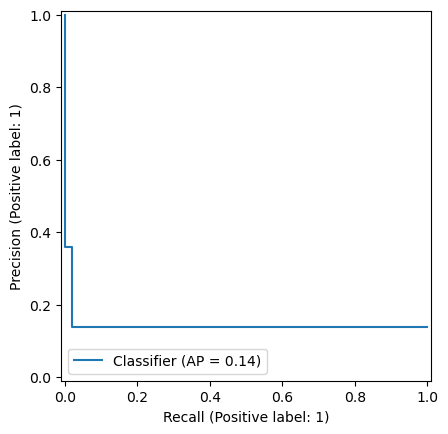

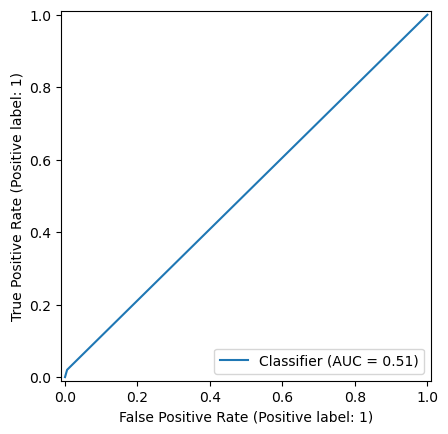

In [196]:
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

# Problem 2

In [197]:
p2_h1_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h1_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p2_h1_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

In [198]:
p2_out = p2_h1_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
precision, recall, thresholds = binary_precision_recall_curve(input=predicted, target=p1_y_test_pth)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))

Accuracy of the network 85.9508 %


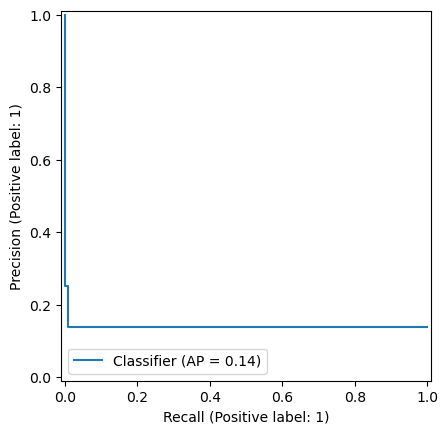

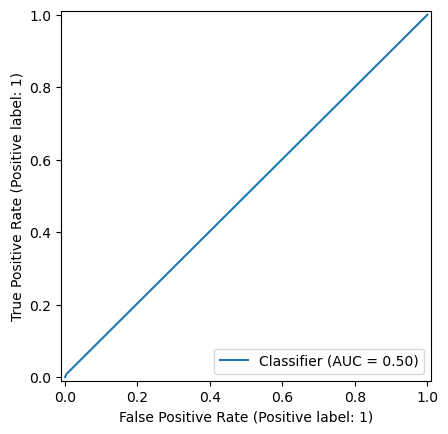

In [199]:
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

In [200]:
p2_h1_reLU_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.ReLU(),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h1_reLU_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p2_h1_reLU_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

Accuracy of the network 86.1913 %


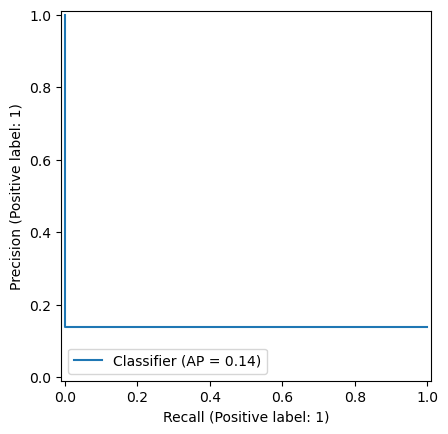

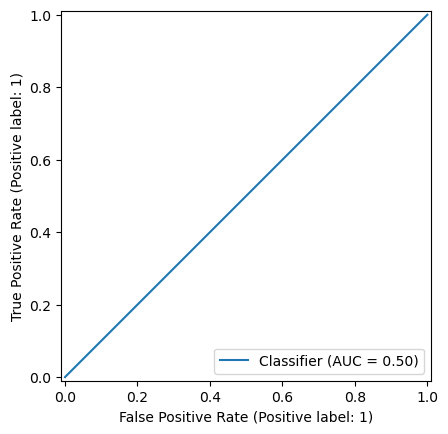

In [201]:
p2_out = p2_h1_reLU_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
precision, recall, thresholds = binary_precision_recall_curve(input=predicted, target=p1_y_test_pth)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

[EPOCH]: 0, [LOSS]: 0.636089, [ACCURACY]: 0.836
[EPOCH]: 1, [LOSS]: 0.633638, [ACCURACY]: 0.838
[EPOCH]: 2, [LOSS]: 0.631220, [ACCURACY]: 0.840
[EPOCH]: 3, [LOSS]: 0.628834, [ACCURACY]: 0.841
[EPOCH]: 4, [LOSS]: 0.626480, [ACCURACY]: 0.842
[EPOCH]: 5, [LOSS]: 0.624156, [ACCURACY]: 0.844
[EPOCH]: 6, [LOSS]: 0.621863, [ACCURACY]: 0.845
[EPOCH]: 7, [LOSS]: 0.619600, [ACCURACY]: 0.846
[EPOCH]: 8, [LOSS]: 0.617367, [ACCURACY]: 0.847
[EPOCH]: 9, [LOSS]: 0.615162, [ACCURACY]: 0.848
[EPOCH]: 10, [LOSS]: 0.612987, [ACCURACY]: 0.849
[EPOCH]: 11, [LOSS]: 0.610839, [ACCURACY]: 0.850
[EPOCH]: 12, [LOSS]: 0.608719, [ACCURACY]: 0.851
[EPOCH]: 13, [LOSS]: 0.606627, [ACCURACY]: 0.852
[EPOCH]: 14, [LOSS]: 0.604561, [ACCURACY]: 0.853
[EPOCH]: 15, [LOSS]: 0.602522, [ACCURACY]: 0.853
[EPOCH]: 16, [LOSS]: 0.600508, [ACCURACY]: 0.854
[EPOCH]: 17, [LOSS]: 0.598521, [ACCURACY]: 0.855
[EPOCH]: 18, [LOSS]: 0.596558, [ACCURACY]: 0.855
[EPOCH]: 19, [LOSS]: 0.594620, [ACCURACY]: 0.856
[EPOCH]: 20, [LOSS]: 0.592707,

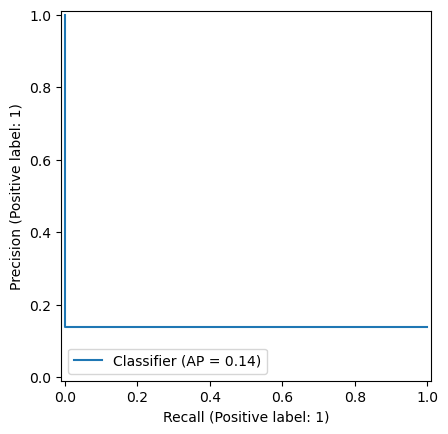

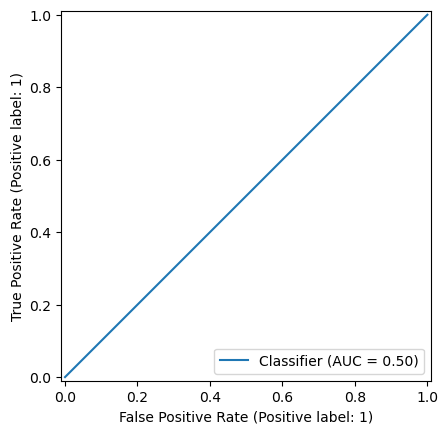

In [202]:
p2_h1_sigmoid_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.Sigmoid(),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h1_sigmoid_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p2_h1_sigmoid_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

p2_out = p2_h1_sigmoid_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

[EPOCH]: 0, [LOSS]: 0.500572, [ACCURACY]: 0.860
[EPOCH]: 1, [LOSS]: 0.495928, [ACCURACY]: 0.860
[EPOCH]: 2, [LOSS]: 0.492148, [ACCURACY]: 0.860
[EPOCH]: 3, [LOSS]: 0.489033, [ACCURACY]: 0.860
[EPOCH]: 4, [LOSS]: 0.486434, [ACCURACY]: 0.860
[EPOCH]: 5, [LOSS]: 0.484237, [ACCURACY]: 0.860
[EPOCH]: 6, [LOSS]: 0.482356, [ACCURACY]: 0.860
[EPOCH]: 7, [LOSS]: 0.480727, [ACCURACY]: 0.860
[EPOCH]: 8, [LOSS]: 0.479298, [ACCURACY]: 0.860
[EPOCH]: 9, [LOSS]: 0.478030, [ACCURACY]: 0.860
[EPOCH]: 10, [LOSS]: 0.476892, [ACCURACY]: 0.860
[EPOCH]: 11, [LOSS]: 0.475860, [ACCURACY]: 0.860
[EPOCH]: 12, [LOSS]: 0.474914, [ACCURACY]: 0.860
[EPOCH]: 13, [LOSS]: 0.474039, [ACCURACY]: 0.860
[EPOCH]: 14, [LOSS]: 0.473222, [ACCURACY]: 0.860
[EPOCH]: 15, [LOSS]: 0.472454, [ACCURACY]: 0.860
[EPOCH]: 16, [LOSS]: 0.471727, [ACCURACY]: 0.860
[EPOCH]: 17, [LOSS]: 0.471034, [ACCURACY]: 0.860
[EPOCH]: 18, [LOSS]: 0.470371, [ACCURACY]: 0.860
[EPOCH]: 19, [LOSS]: 0.469733, [ACCURACY]: 0.860
[EPOCH]: 20, [LOSS]: 0.469116,

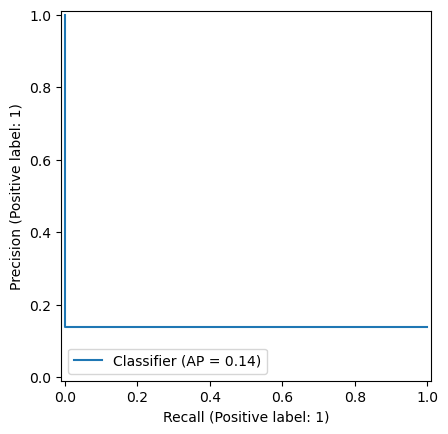

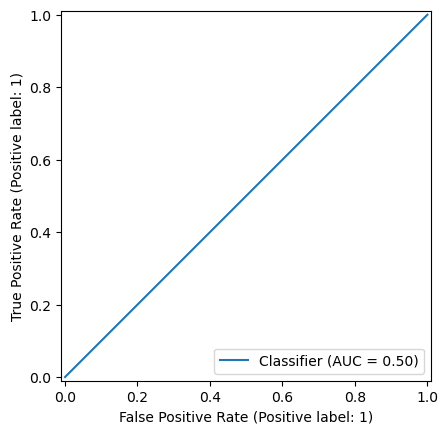

In [203]:
p2_h2_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.Linear(17, 17),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h2_model.parameters(), lr=1e-3, weight_decay=1e-2) 
for t in range(1000):
    y_pred = p2_h2_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

p2_out = p2_h2_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

Accuracy of the network 86.1932 %


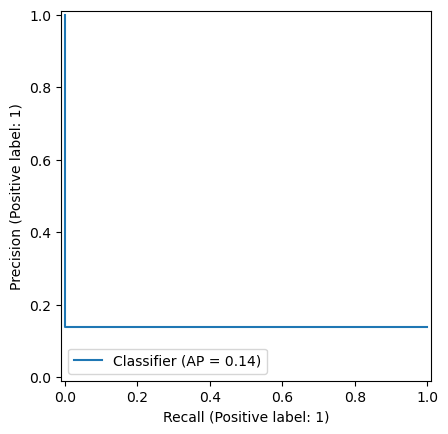

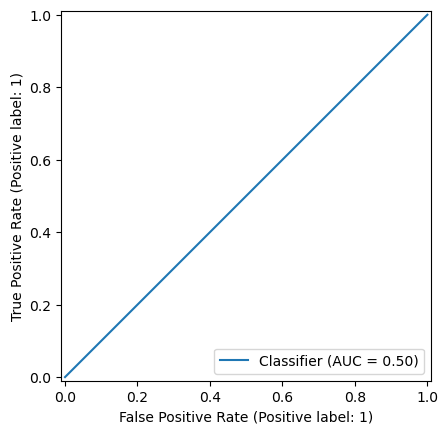

In [204]:
p2_h2_reLU_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.ReLU(),
    torch.nn.Linear(17, 17),
    torch.nn.ReLU(),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h2_reLU_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p2_h2_reLU_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    #print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

p2_out = p2_h2_reLU_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

Accuracy of the network 86.1932 %


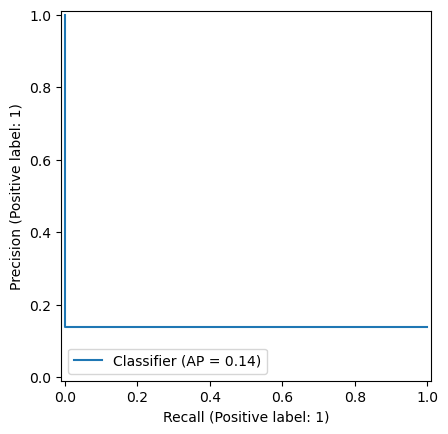

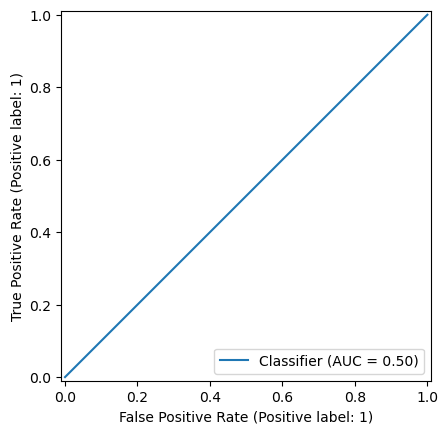

In [207]:
p2_h2_sigmoid_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.Sigmoid(),
    torch.nn.Linear(17, 17),
    torch.nn.Sigmoid(),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p2_h2_sigmoid_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p2_h2_sigmoid_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    #print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

p2_out = p2_h2_sigmoid_model(p1_X_test_pth)
_, predicted = torch.max(p2_out.data, 1)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

# Problem 3

Accuracy of the network 86.1834 %


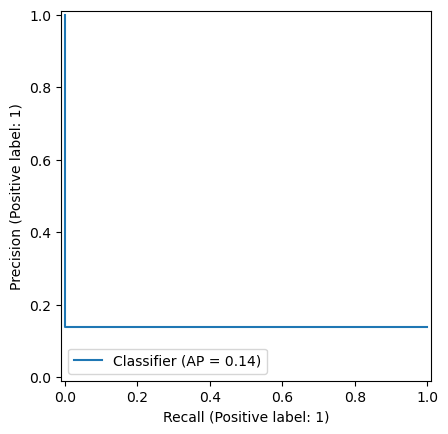

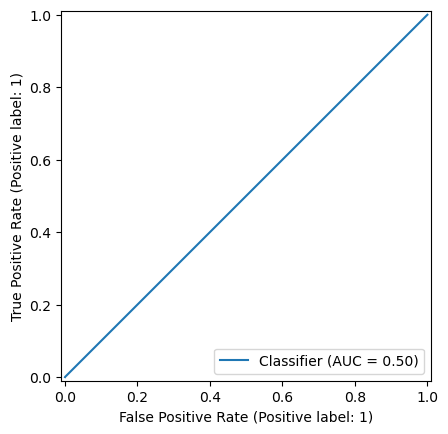

In [212]:
p3_model = torch.nn.Sequential(
    torch.nn.Linear(31, 17),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(17, 17),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(17, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(p3_model.parameters(), lr=1e-3, weight_decay=1e-1) 
for t in range(1000):
    y_pred = p3_model(p1_X_train_pth)
    loss = criterion(y_pred, p1_y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (p1_y_train_pth == predicted).sum() / len(p1_y_train)
    #print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

p3_out = p3_model(p1_X_test_pth)
_, predicted = torch.max(p3_out.data, 1)
print('Accuracy of the network %.4f %%' % (100 * torch.sum(p1_y_test_pth==predicted).double() / len(p1_y_test_pth)))
metrics.PrecisionRecallDisplay.from_predictions(p1_y_test,predicted.numpy())
metrics.RocCurveDisplay.from_predictions(p1_y_test,predicted.numpy())

# Problem 4

In [60]:
X = onehot_nanless_data[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
y = onehot_nanless_data[:,3]

In [61]:
normalized_y = StandardScaler().fit_transform(y.reshape(-1, 1))

In [62]:
p4_X_train, p4_X_test, p4_y_train, p4_y_test = model_selection.train_test_split(X,normalized_y, test_size = 0.2)
p4_X_train_pth = torch.as_tensor(p4_X_train, dtype=torch.float)
p4_X_test_pth = torch.as_tensor(p4_X_test, dtype=torch.float)
p4_y_train_pth = torch.as_tensor(p4_y_train).float()
p4_y_test_pth = torch.as_tensor(p4_y_test).float()

In [63]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 0, [LOSS or MSE]: 1.227409
[EPOCH]: 1, [LOSS or MSE]: 1.207205
[EPOCH]: 2, [LOSS or MSE]: 1.191165
[EPOCH]: 3, [LOSS or MSE]: 1.177848
[EPOCH]: 4, [LOSS or MSE]: 1.166394
[EPOCH]: 5, [LOSS or MSE]: 1.156280
[EPOCH]: 6, [LOSS or MSE]: 1.147183
[EPOCH]: 7, [LOSS or MSE]: 1.138894
[EPOCH]: 8, [LOSS or MSE]: 1.131278
[EPOCH]: 9, [LOSS or MSE]: 1.124237
[EPOCH]: 10, [LOSS or MSE]: 1.117702
[EPOCH]: 11, [LOSS or MSE]: 1.111621
[EPOCH]: 12, [LOSS or MSE]: 1.105950
[EPOCH]: 13, [LOSS or MSE]: 1.100654
[EPOCH]: 14, [LOSS or MSE]: 1.095703
[EPOCH]: 15, [LOSS or MSE]: 1.091069
[EPOCH]: 16, [LOSS or MSE]: 1.086730
[EPOCH]: 17, [LOSS or MSE]: 1.082663
[EPOCH]: 18, [LOSS or MSE]: 1.078849
[EPOCH]: 19, [LOSS or MSE]: 1.075270
[EPOCH]: 20, [LOSS or MSE]: 1.071911
[EPOCH]: 21, [LOSS or MSE]: 1.068755
[EPOCH]: 22, [LOSS or MSE]: 1.065789
[EPOCH]: 23, [LOSS or MSE]: 1.063001
[EPOCH]: 24, [LOSS or MSE]: 1.060378
[EPOCH]: 25, [LOSS or MSE]: 1.057909
[EPOCH]: 26, [LOSS or MSE]: 1.055584
[EPOCH]: 27

In [64]:
y_pred = p4_model(p4_X_test_pth)

In [65]:
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())

Text(0, 0.5, 'Residual')

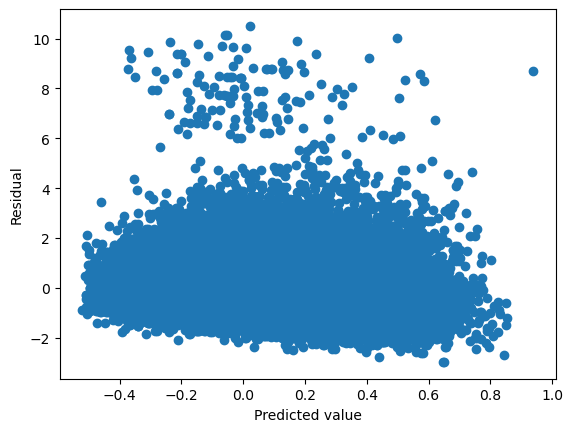

In [66]:
plt.scatter(y_pred.data.cpu().numpy(),residual)
plt.xlabel("Predicted value")
plt.ylabel("Residual")

In [67]:
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.97231644

In [71]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 1.341508
[EPOCH]: 1, [LOSS or MSE]: 1.303257
[EPOCH]: 2, [LOSS or MSE]: 1.270347
[EPOCH]: 3, [LOSS or MSE]: 1.241950
[EPOCH]: 4, [LOSS or MSE]: 1.217384
[EPOCH]: 5, [LOSS or MSE]: 1.196081
[EPOCH]: 6, [LOSS or MSE]: 1.177565
[EPOCH]: 7, [LOSS or MSE]: 1.161435
[EPOCH]: 8, [LOSS or MSE]: 1.147349
[EPOCH]: 9, [LOSS or MSE]: 1.135023
[EPOCH]: 10, [LOSS or MSE]: 1.124211
[EPOCH]: 11, [LOSS or MSE]: 1.114705
[EPOCH]: 12, [LOSS or MSE]: 1.106328
[EPOCH]: 13, [LOSS or MSE]: 1.098928
[EPOCH]: 14, [LOSS or MSE]: 1.092372
[EPOCH]: 15, [LOSS or MSE]: 1.086548
[EPOCH]: 16, [LOSS or MSE]: 1.081359
[EPOCH]: 17, [LOSS or MSE]: 1.076723
[EPOCH]: 18, [LOSS or MSE]: 1.072567
[EPOCH]: 19, [LOSS or MSE]: 1.068827
[EPOCH]: 20, [LOSS or MSE]: 1.065451
[EPOCH]: 21, [LOSS or MSE]: 1.062393
[EPOCH]: 22, [LOSS or MSE]: 1.059613
[EPOCH]: 23, [LOSS or MSE]: 1.057077
[EPOCH]: 24, [LOSS or MSE]: 1.054755
[EPOCH]: 25, [LOSS or MSE]: 1.052621
[EPOCH]: 26, [LOSS or MSE]: 1.050652
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9890313

In [73]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 0.988353
[EPOCH]: 1, [LOSS or MSE]: 0.988342
[EPOCH]: 2, [LOSS or MSE]: 0.988331
[EPOCH]: 3, [LOSS or MSE]: 0.988320
[EPOCH]: 4, [LOSS or MSE]: 0.988309
[EPOCH]: 5, [LOSS or MSE]: 0.988298
[EPOCH]: 6, [LOSS or MSE]: 0.988287
[EPOCH]: 7, [LOSS or MSE]: 0.988276
[EPOCH]: 8, [LOSS or MSE]: 0.988266
[EPOCH]: 9, [LOSS or MSE]: 0.988255
[EPOCH]: 10, [LOSS or MSE]: 0.988244
[EPOCH]: 11, [LOSS or MSE]: 0.988233
[EPOCH]: 12, [LOSS or MSE]: 0.988222
[EPOCH]: 13, [LOSS or MSE]: 0.988211
[EPOCH]: 14, [LOSS or MSE]: 0.988201
[EPOCH]: 15, [LOSS or MSE]: 0.988190
[EPOCH]: 16, [LOSS or MSE]: 0.988179
[EPOCH]: 17, [LOSS or MSE]: 0.988169
[EPOCH]: 18, [LOSS or MSE]: 0.988158
[EPOCH]: 19, [LOSS or MSE]: 0.988147
[EPOCH]: 20, [LOSS or MSE]: 0.988137
[EPOCH]: 21, [LOSS or MSE]: 0.988126
[EPOCH]: 22, [LOSS or MSE]: 0.988115
[EPOCH]: 23, [LOSS or MSE]: 0.988105
[EPOCH]: 24, [LOSS or MSE]: 0.988094
[EPOCH]: 25, [LOSS or MSE]: 0.988083
[EPOCH]: 26, [LOSS or MSE]: 0.988073
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9921304

# Problem 5

In [96]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.Linear(16, 16),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 1.152656
[EPOCH]: 1, [LOSS or MSE]: 1.125286
[EPOCH]: 2, [LOSS or MSE]: 1.102621
[EPOCH]: 3, [LOSS or MSE]: 1.083806
[EPOCH]: 4, [LOSS or MSE]: 1.068153
[EPOCH]: 5, [LOSS or MSE]: 1.055103
[EPOCH]: 6, [LOSS or MSE]: 1.044202
[EPOCH]: 7, [LOSS or MSE]: 1.035077
[EPOCH]: 8, [LOSS or MSE]: 1.027424
[EPOCH]: 9, [LOSS or MSE]: 1.020991
[EPOCH]: 10, [LOSS or MSE]: 1.015571
[EPOCH]: 11, [LOSS or MSE]: 1.010995
[EPOCH]: 12, [LOSS or MSE]: 1.007120
[EPOCH]: 13, [LOSS or MSE]: 1.003830
[EPOCH]: 14, [LOSS or MSE]: 1.001027
[EPOCH]: 15, [LOSS or MSE]: 0.998632
[EPOCH]: 16, [LOSS or MSE]: 0.996577
[EPOCH]: 17, [LOSS or MSE]: 0.994807
[EPOCH]: 18, [LOSS or MSE]: 0.993276
[EPOCH]: 19, [LOSS or MSE]: 0.991945
[EPOCH]: 20, [LOSS or MSE]: 0.990782
[EPOCH]: 21, [LOSS or MSE]: 0.989760
[EPOCH]: 22, [LOSS or MSE]: 0.988858
[EPOCH]: 23, [LOSS or MSE]: 0.988056
[EPOCH]: 24, [LOSS or MSE]: 0.987339
[EPOCH]: 25, [LOSS or MSE]: 0.986695
[EPOCH]: 26, [LOSS or MSE]: 0.986111
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.96167696

Text(0, 0.5, 'Residual')

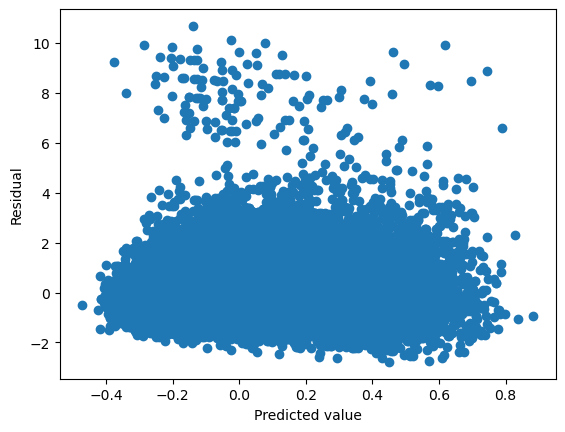

In [97]:
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
plt.scatter(y_pred.data.cpu().numpy(),residual)
plt.xlabel("Predicted value")
plt.ylabel("Residual")

In [98]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.Linear(16, 16),
    torch.nn.Linear(16, 16),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 1.020557
[EPOCH]: 1, [LOSS or MSE]: 1.019272
[EPOCH]: 2, [LOSS or MSE]: 1.018044
[EPOCH]: 3, [LOSS or MSE]: 1.016870
[EPOCH]: 4, [LOSS or MSE]: 1.015746
[EPOCH]: 5, [LOSS or MSE]: 1.014670
[EPOCH]: 6, [LOSS or MSE]: 1.013641
[EPOCH]: 7, [LOSS or MSE]: 1.012654
[EPOCH]: 8, [LOSS or MSE]: 1.011709
[EPOCH]: 9, [LOSS or MSE]: 1.010803
[EPOCH]: 10, [LOSS or MSE]: 1.009934
[EPOCH]: 11, [LOSS or MSE]: 1.009101
[EPOCH]: 12, [LOSS or MSE]: 1.008301
[EPOCH]: 13, [LOSS or MSE]: 1.007533
[EPOCH]: 14, [LOSS or MSE]: 1.006796
[EPOCH]: 15, [LOSS or MSE]: 1.006088
[EPOCH]: 16, [LOSS or MSE]: 1.005408
[EPOCH]: 17, [LOSS or MSE]: 1.004754
[EPOCH]: 18, [LOSS or MSE]: 1.004125
[EPOCH]: 19, [LOSS or MSE]: 1.003520
[EPOCH]: 20, [LOSS or MSE]: 1.002938
[EPOCH]: 21, [LOSS or MSE]: 1.002377
[EPOCH]: 22, [LOSS or MSE]: 1.001838
[EPOCH]: 23, [LOSS or MSE]: 1.001318
[EPOCH]: 24, [LOSS or MSE]: 1.000817
[EPOCH]: 25, [LOSS or MSE]: 1.000335
[EPOCH]: 26, [LOSS or MSE]: 0.999870
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9876242

In [99]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 1.049075
[EPOCH]: 1, [LOSS or MSE]: 1.045749
[EPOCH]: 2, [LOSS or MSE]: 1.042629
[EPOCH]: 3, [LOSS or MSE]: 1.039705
[EPOCH]: 4, [LOSS or MSE]: 1.036959
[EPOCH]: 5, [LOSS or MSE]: 1.034382
[EPOCH]: 6, [LOSS or MSE]: 1.031961
[EPOCH]: 7, [LOSS or MSE]: 1.029685
[EPOCH]: 8, [LOSS or MSE]: 1.027547
[EPOCH]: 9, [LOSS or MSE]: 1.025534
[EPOCH]: 10, [LOSS or MSE]: 1.023640
[EPOCH]: 11, [LOSS or MSE]: 1.021858
[EPOCH]: 12, [LOSS or MSE]: 1.020180
[EPOCH]: 13, [LOSS or MSE]: 1.018600
[EPOCH]: 14, [LOSS or MSE]: 1.017109
[EPOCH]: 15, [LOSS or MSE]: 1.015704
[EPOCH]: 16, [LOSS or MSE]: 1.014380
[EPOCH]: 17, [LOSS or MSE]: 1.013130
[EPOCH]: 18, [LOSS or MSE]: 1.011949
[EPOCH]: 19, [LOSS or MSE]: 1.010833
[EPOCH]: 20, [LOSS or MSE]: 1.009779
[EPOCH]: 21, [LOSS or MSE]: 1.008782
[EPOCH]: 22, [LOSS or MSE]: 1.007840
[EPOCH]: 23, [LOSS or MSE]: 1.006948
[EPOCH]: 24, [LOSS or MSE]: 1.006105
[EPOCH]: 25, [LOSS or MSE]: 1.005306
[EPOCH]: 26, [LOSS or MSE]: 1.004549
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9850861

In [100]:
p4_model = torch.nn.Sequential(
    torch.nn.Linear(31, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(p4_model.parameters(), lr=1e-3, weight_decay=1e-2) 

for t in range(1000):
    y_pred = p4_model(p4_X_train_pth)
    loss = criterion(y_pred, p4_y_train_pth.view(-1, 1))
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = p4_model(p4_X_test_pth)
residual = np.subtract(p4_y_test_pth.view(-1, 1).data.cpu().numpy(),y_pred.data.cpu().numpy())
metrics.mean_squared_error(p4_y_test_pth.view(-1, 1).data.cpu().numpy(), y_pred.data.cpu().numpy(), squared=False)

[EPOCH]: 0, [LOSS or MSE]: 1.058596
[EPOCH]: 1, [LOSS or MSE]: 1.057356
[EPOCH]: 2, [LOSS or MSE]: 1.056142
[EPOCH]: 3, [LOSS or MSE]: 1.054954
[EPOCH]: 4, [LOSS or MSE]: 1.053791
[EPOCH]: 5, [LOSS or MSE]: 1.052652
[EPOCH]: 6, [LOSS or MSE]: 1.051538
[EPOCH]: 7, [LOSS or MSE]: 1.050446
[EPOCH]: 8, [LOSS or MSE]: 1.049378
[EPOCH]: 9, [LOSS or MSE]: 1.048333
[EPOCH]: 10, [LOSS or MSE]: 1.047309
[EPOCH]: 11, [LOSS or MSE]: 1.046307
[EPOCH]: 12, [LOSS or MSE]: 1.045326
[EPOCH]: 13, [LOSS or MSE]: 1.044366
[EPOCH]: 14, [LOSS or MSE]: 1.043426
[EPOCH]: 15, [LOSS or MSE]: 1.042506
[EPOCH]: 16, [LOSS or MSE]: 1.041605
[EPOCH]: 17, [LOSS or MSE]: 1.040723
[EPOCH]: 18, [LOSS or MSE]: 1.039860
[EPOCH]: 19, [LOSS or MSE]: 1.039015
[EPOCH]: 20, [LOSS or MSE]: 1.038188
[EPOCH]: 21, [LOSS or MSE]: 1.037378
[EPOCH]: 22, [LOSS or MSE]: 1.036585
[EPOCH]: 23, [LOSS or MSE]: 1.035809
[EPOCH]: 24, [LOSS or MSE]: 1.035049
[EPOCH]: 25, [LOSS or MSE]: 1.034306
[EPOCH]: 26, [LOSS or MSE]: 1.033577
[EPOCH]: 27

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0002335